<a href="https://colab.research.google.com/github/zinakhazaee/MachineLearning-UnSupervisedLearning_Clustering/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1: Business Understanding

### Question 1: What Kind of Players we have in the Tournament?

# Section 2: Data Understanding

## Gather Data

Importing appropriate libraries

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

Loading Data
- Loading Ind Average.csv into a dataframe, Individual Average Game Stats
- Loading Players.csv into a dataframe, Player Information dataset

In [ ]:
game_stats = pd.read_csv("averages.csv")
players = pd.read_csv("players.csv")

In [ ]:
players.head()

,Id,SN,Player Name,POS,Height,Nationality
0,P_142950,7,Aren Davoudichegani,PG,186,IRI
1,P_142957,15,Hamed EHaddadi,C,218,IRI
2,P_152307,22,Nick Fazekas,C,207,JPN
3,P_152309,12,CJ Giles,C,211,BRN
4,P_152335,8,Saeid Davarpanah,SF,190,IRI


Id: Unique Identifier

SN: Shirt Number [0/00 - 99]
POS: Position ['PG', 'SG', 'SF', 'PF', 'C']
Height: In Centimeters
Nationality: Country Code ISO Alpha‑3

In [ ]:
game_stats.head()

,Id,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,2PM,...,ORtg,eFG%,TS%,FT Rate,AST Rate,AST/TO,TOV Rate,ORB%,DRB%,USG%
0,P_239228,16.30000,12.5,4.0,9.00,37.50000,2.000,4.50,46.43000,2.000,...,142.21000,72.91500,58.33500,35.71500,0.52000,3.5000,0.08500,2.630,4.5000,20.19000
1,P_215434,19.96000,11.0,4.0,8.75,40.96875,2.125,5.75,30.95125,1.875,...,106.33625,48.33500,53.48375,8.95125,0.12125,0.7500,0.10000,2.440,6.5825,17.31875
2,P_265287,12.43500,2.5,1.0,4.50,25.00000,0.000,1.00,0.00000,1.000,...,60.57500,0.00000,25.00000,12.50000,0.09500,0.5000,0.21000,2.325,6.2500,17.48500
3,P_205891,18.19000,12.0,5.5,8.00,65.00000,0.500,0.50,50.00000,5.000,...,141.63500,50.00000,65.91000,5.00000,0.29500,1.5000,0.07500,6.430,8.2500,13.82000
4,P_209340,24.16625,12.0,4.5,8.75,49.79375,1.000,3.25,28.95750,3.500,...,136.10750,44.47875,59.41500,22.35625,0.50250,4.5625,0.10625,8.185,10.9425,17.67875


Id: Unique Identifier

### Primary Metrics:
MIN: Minutes, Playing Time
PTS: Points
FGM: Field Goals Made
FGA: Field Goals Attempted
FG%: Field Goals Percentage
3PM: 3-Points Made
3PA: 3-Points Attempted
2PM: 2-Points Made
2PA: 2-Points Attempted
FTM: Free Throws Made
FTA: Free Throws Attempted
DR: Defensive Rebounds
OR: Offensive Rebounds
TR: Total Rebounds
AST: Assists
TO: Turnovers
STL: Steals
BLK: Blocks
TPF: Total Personal Fouls
TPFD: Total Personal Fouls Drawn
TSFD: Total Shooting Fouls Drawn
Mid Range
Paint

### Secondary Metrics:

Floor%: Percentage of Used Possessions
DRtg: Defensive Rating
ORtg: Offensive Rating
eFG%: Effective Field Goals Percentage
TS%: True Shooting Percentage
FT Rate: Free Throw Rate
AST Rate: Assist Rate
AST/TO: Assist / Turnovers
TOV Rate: Turnovers Rate
ORB: Offensive Rebound Percentage
DRB: Defensive Rebound Percentage
USG%: Usage Percentage

## Analyze Data

In [ ]:
# Checking Number of Rows and Columns

players.shape

(403, 6)

In [ ]:
# Checking Number of Rows and Columns

game_stats.shape

(416, 45)

In [ ]:
# Checking Null values in Players Dataset

players.isna().sum()

Id             0
SN             0
Player Name    0
POS            0
Height         0
Nationality    0
dtype: int64

In [ ]:
# Checking Null values in Game Stats

game_stats.isna().sum()

Id             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3PM            0
3PA            0
3P%            0
2PM            0
2PA            0
2P%            0
FTM            0
FTA            0
FT%            0
DR             0
OR             0
TR             0
AST            0
TO             0
STL            0
BLK            0
TPF            0
TPFD           0
TSFD           0
MidRangePTS    0
MidRangeM      0
MidRangeA      0
MidRange%      0
PaintPTS       0
PaintM         0
PaintA         0
Paint%         0
Floor%         0
DRtg           0
ORtg           0
eFG%           0
TS%            0
FT Rate        0
AST Rate       0
AST/TO         0
TOV Rate       0
ORB%           0
DRB%           0
USG%           0
dtype: int64

In [ ]:
# Checking for Duplicates in Game Stats

game_stats['Id'].duplicated().sum()

13

In [ ]:
# Checking for Duplicates in Players Dataset

players['Id'].duplicated().sum()

0

In [ ]:
# Taking a closer look at duplicated rows in Game Stats

duplicates = game_stats[game_stats['Id'].duplicated()]
game_stats.loc[game_stats['Id'].isin(duplicates.Id)].sort_values('Id')

,Id,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,2PM,...,ORtg,eFG%,TS%,FT Rate,AST Rate,AST/TO,TOV Rate,ORB%,DRB%,USG%
144,P_152309,28.660000,9.500000,3.000000,6.000000,48.570000,0.000000,0.000000,0.000000,3.000000,...,89.320000,16.665000,59.125000,61.430000,0.120000,0.375000,0.330000,7.105000,21.600000,18.040000
123,P_152309,38.600000,15.000000,7.000000,12.000000,58.330000,1.000000,2.000000,50.000000,6.000000,...,118.160000,50.000000,62.500000,0.000000,0.190000,2.000000,0.090000,0.000000,30.770000,13.980000
308,P_152341,6.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,39.680000,0.000000,0.000000,0.000000,0.810000,1.000000,0.810000,0.000000,2.500000,16.280000
315,P_152341,13.130000,2.000000,1.000000,3.000000,33.330000,0.000000,0.000000,0.000000,1.000000,...,50.580000,0.000000,33.330000,0.000000,0.230000,0.500000,0.470000,0.000000,6.670000,15.560000
54,P_173563,30.647778,15.666667,5.777778,13.888889,37.084444,0.555556,2.000000,10.476667,5.222222,...,90.046667,35.942222,42.431111,21.848889,0.326667,2.852222,0.174444,1.396667,4.308889,21.213333
128,P_173563,30.840000,18.500000,7.000000,16.500000,42.645000,1.500000,3.000000,30.000000,5.500000,...,98.385000,41.095000,52.695000,18.565000,0.200000,1.165000,0.175000,1.615000,5.440000,24.450000
129,P_173564,35.785000,12.000000,4.500000,6.000000,75.000000,0.000000,0.000000,0.000000,4.500000,...,159.990000,0.000000,81.250000,50.000000,0.785000,5.000000,0.165000,17.365000,44.120000,13.415000
55,P_173564,23.894444,6.111111,2.333333,4.777778,40.396667,0.000000,0.000000,0.000000,2.333333,...,105.905556,0.000000,48.158889,30.370000,0.292222,1.777778,0.151111,8.371111,12.973333,10.434444
275,P_192465,28.553750,14.750000,6.000000,13.000000,50.021250,0.875000,2.625000,31.250000,5.125000,...,97.660000,48.611250,56.160000,14.183750,0.152500,0.541250,0.241250,5.986250,11.121250,21.746250
240,P_192465,20.145000,8.000000,3.500000,8.000000,42.065000,0.000000,1.000000,0.000000,3.500000,...,98.355000,0.000000,44.285000,11.110000,0.405000,2.665000,0.200000,6.630000,15.910000,23.375000


<Axes: >

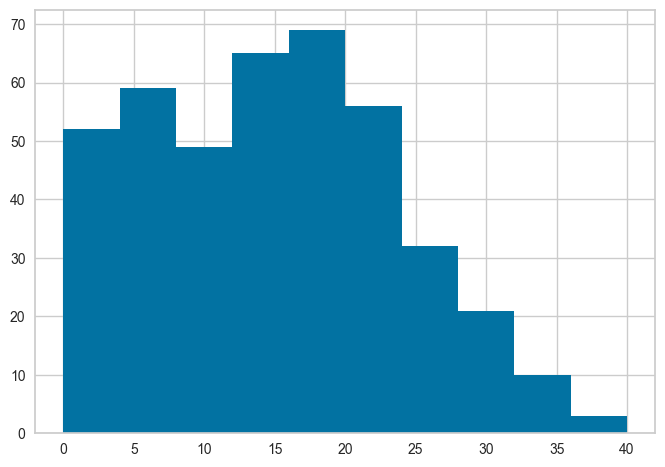

In [ ]:
# Checking Players Minutes Distribution

game_stats['MIN'].hist()

<Axes: >

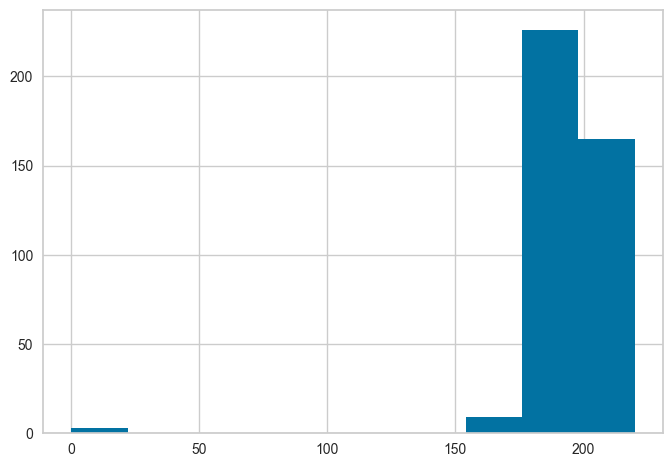

In [ ]:
# Checking Players Heights Distribution

players['Height'].hist()

In [ ]:
players_df = players[players['Height'] > 0]['Height']

<Axes: >

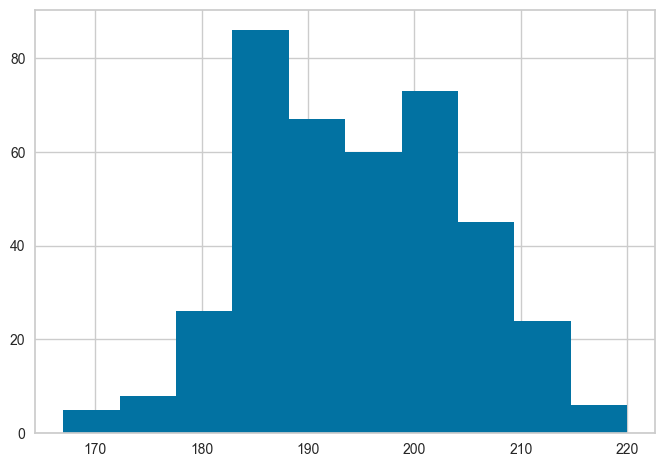

In [ ]:
players_df.hist()

In [ ]:
players_df.describe()

count    400.000000
mean     194.612500
std        9.899614
min      167.000000
25%      187.000000
50%      194.000000
75%      202.250000
max      220.000000
Name: Height, dtype: float64

In [ ]:
players.groupby('POS').count()['Player Name']

POS
C      78
PF     98
PG    133
SF     33
SG     61
Name: Player Name, dtype: int64

<Axes: xlabel='POS'>

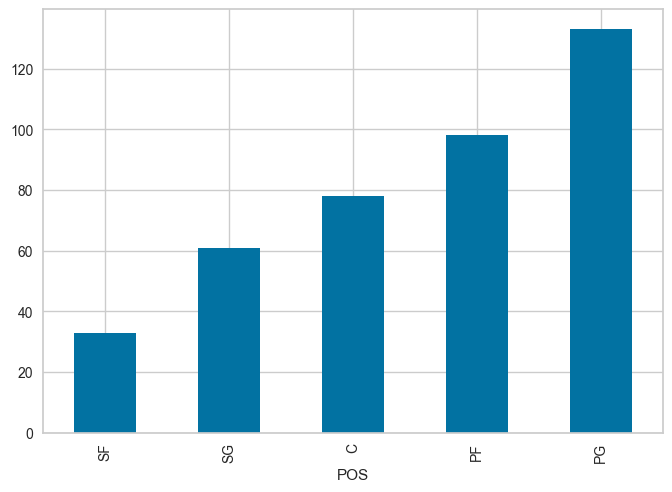

In [ ]:
players.groupby('POS').count()['Player Name'].sort_values().plot.bar()

In basketball, there are five traditional positions, each with its specific responsibilities and roles:


    - Point Guard: Typically the team's primary ball-handler and playmaker. The point guard is responsible for initiating the team's offense, setting up plays, and directing the team's movement on the court.

    - Shooting Guard: Usually the team's best shooter and scorer. The shooting guard is responsible for making perimeter shots, driving to the basket, and playing defense against the opposing team's guards.

    - Small Forward: Usually a versatile player who can play both inside and outside. The small forward is responsible for scoring, rebounding, and playing defense.

    - Power Forward: Typically a strong and athletic player who plays in the frontcourt. The power forward is responsible for rebounding, playing defense, and scoring close to the basket.

    - Center: Usually the tallest player on the team, the center is responsible for defending the basket, rebounding, and scoring close to the basket.

# Section 3: Data Preparation

In [ ]:
# Averaging Duplicated rows in the dataset

grouped = game_stats.groupby('Id').mean().round(2)
grouped.head()

,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,2PM,2PA,...,ORtg,eFG%,TS%,FT Rate,AST Rate,AST/TO,TOV Rate,ORB%,DRB%,USG%
Id,,,,,,,,,,,,,,,,,,,,,
P_142950,4.26,1.00,0.00,1.0,0.00,0.0,0.50,0.00,0.00,0.50,...,36.54,0.00,16.66,50.00,0.00,0.00,0.00,0.00,2.94,8.02
P_142957,27.31,14.75,5.25,12.0,45.00,0.0,1.25,0.00,5.25,10.75,...,107.53,6.25,55.07,38.34,0.25,1.60,0.22,9.18,20.90,23.08
P_152307,21.77,8.00,3.00,10.0,30.00,0.0,4.00,0.00,3.00,6.00,...,74.46,0.00,36.36,20.00,0.19,2.00,0.09,0.00,17.78,22.24
P_152309,33.63,12.25,5.00,9.0,53.45,0.5,1.00,25.00,4.50,8.00,...,103.74,33.33,60.81,30.72,0.16,1.19,0.21,3.55,26.18,16.01
P_152335,23.79,7.50,3.00,9.0,34.86,1.0,4.50,39.38,2.00,4.50,...,89.56,37.20,42.54,5.56,0.37,2.50,0.18,2.46,2.30,19.42


In [ ]:
grouped.shape

(403, 44)

In [ ]:
# Merging the two Datasets

data = pd.merge(players, grouped, on='Id')

In [ ]:
data.head()

,Id,SN,Player Name,POS,Height,Nationality,MIN,PTS,FGM,FGA,...,ORtg,eFG%,TS%,FT Rate,AST Rate,AST/TO,TOV Rate,ORB%,DRB%,USG%
0,P_142950,7,Aren Davoudichegani,PG,186,IRI,4.26,1.00,0.00,1.0,...,36.54,0.00,16.66,50.00,0.00,0.00,0.00,0.00,2.94,8.02
1,P_142957,15,Hamed EHaddadi,C,218,IRI,27.31,14.75,5.25,12.0,...,107.53,6.25,55.07,38.34,0.25,1.60,0.22,9.18,20.90,23.08
2,P_152307,22,Nick Fazekas,C,207,JPN,21.77,8.00,3.00,10.0,...,74.46,0.00,36.36,20.00,0.19,2.00,0.09,0.00,17.78,22.24
3,P_152309,12,CJ Giles,C,211,BRN,33.63,12.25,5.00,9.0,...,103.74,33.33,60.81,30.72,0.16,1.19,0.21,3.55,26.18,16.01
4,P_152335,8,Saeid Davarpanah,SF,190,IRI,23.79,7.50,3.00,9.0,...,89.56,37.20,42.54,5.56,0.37,2.50,0.18,2.46,2.30,19.42


In [ ]:
# Dropping unnecessary columns

data.drop(['SN', 'Height', 'Nationality'], axis=1, inplace=True)

In [ ]:
data.shape[0] # Total number of players

403

In [ ]:
data['MIN'].describe()

count    403.000000
mean      14.743474
std        8.600865
min        0.000000
25%        7.625000
50%       14.860000
75%       20.725000
max       40.000000
Name: MIN, dtype: float64

In [ ]:
data = data[data['MIN'] > 0] # Removing Players that never played

In [ ]:
data.shape[0] # Number of players that played

392

In [ ]:
data['MIN'].mean()

15.15719387755102

In [ ]:
data = data[data['MIN'] > data['MIN'].mean()] # Keeping only the players that played above average playing time in the tournament

In [ ]:
data.shape[0] # Number of players that played above average playing time

198

In [ ]:
data.reset_index(inplace=True, drop=True)

In [ ]:
data.head()

,Id,Player Name,POS,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,ORtg,eFG%,TS%,FT Rate,AST Rate,AST/TO,TOV Rate,ORB%,DRB%,USG%
0,P_142957,Hamed EHaddadi,C,27.31,14.75,5.25,12.0,45.00,0.00,1.25,...,107.53,6.25,55.07,38.34,0.25,1.60,0.22,9.18,20.90,23.08
1,P_152307,Nick Fazekas,C,21.77,8.00,3.00,10.0,30.00,0.00,4.00,...,74.46,0.00,36.36,20.00,0.19,2.00,0.09,0.00,17.78,22.24
2,P_152309,CJ Giles,C,33.63,12.25,5.00,9.0,53.45,0.50,1.00,...,103.74,33.33,60.81,30.72,0.16,1.19,0.21,3.55,26.18,16.01
3,P_152335,Saeid Davarpanah,SF,23.79,7.50,3.00,9.0,34.86,1.00,4.50,...,89.56,37.20,42.54,5.56,0.37,2.50,0.18,2.46,2.30,19.42
4,P_156348,Rob Loe,C,21.48,14.25,5.50,11.0,53.41,2.25,5.50,...,134.94,65.62,68.41,8.48,0.23,2.08,0.14,10.86,14.45,21.60


In [ ]:
data.columns

Index(['Id', 'Player Name', 'POS', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM',
       '3PA', '3P%', '2PM', '2PA', '2P%', 'FTM', 'FTA', 'FT%', 'DR', 'OR',
       'TR', 'AST', 'TO', 'STL', 'BLK', 'TPF', 'TPFD', 'TSFD', 'MidRangePTS',
       'MidRangeM', 'MidRangeA', 'MidRange%', 'PaintPTS', 'PaintM', 'PaintA',
       'Paint%', 'Floor%', 'DRtg', 'ORtg', 'eFG%', 'TS%', 'FT Rate',
       'AST Rate', 'AST/TO', 'TOV Rate', 'ORB%', 'DRB%', 'USG%'],
      dtype='object')

In [ ]:
features = ['PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', '2PM', '2PA', '2P%', 'FTM', 'FTA', 'FT%',
            'DR', 'OR', 'TR', 'AST', 'TO', 'STL', 'BLK',
            'TPF', 'TPFD', 'TSFD',
            'MidRangePTS', 'MidRangeM', 'MidRangeA', 'MidRange%', 'PaintPTS', 'PaintM', 'PaintA', 'Paint%',
            'Floor%', 'DRtg', 'ORtg', 'eFG%', 'TS%', 'USG%',
            'FT Rate', 'AST Rate', 'AST/TO', 'TOV Rate', 'ORB%', 'DRB%']

In [ ]:
x = data.loc[:, features].values

x = StandardScaler().fit_transform(x) # Normalizing Data

In [ ]:
x

array([[ 1.29271021,  1.23875207,  1.44913078, ...,  0.36384513,
         2.429547  ,  2.59258826],
       [-0.17700345, -0.13479576,  0.80460246, ..., -0.91732774,
        -1.14076039,  1.95952081],
       [ 0.74837182,  1.08613564,  0.4823383 , ...,  0.26529337,
         0.23991403,  3.66393316],
       ...,
       [-1.26568023, -1.05049431, -0.96785041, ...,  0.75805217,
        -1.14076039,  0.40323002],
       [-0.97609221, -0.94671514, -0.91306551, ...,  0.56094865,
        -0.45236779, -0.69652175],
       [ 2.32695315,  2.6122999 ,  1.61026286, ..., -1.41008653,
         0.60939029,  3.09579571]])

Why We Normalize Data?

Normalization is a scaling technique wherein it makes the data scale-free by converting the statistical distribution of the data into the below format:
* mean - 0 (zero)
* standard deviation - 1

In [ ]:
round(np.mean(x)), np.std(x)

(0, 1.0)

How many features should we keep?
Finding the optinal number of features using Principal component analysis

In [ ]:
pca_list = []

for n_components in range(2, 21):
    pca = PCA(n_components = n_components)
    pca.fit_transform(x)
    pca_variance = sum(pca.explained_variance_ratio_)
    pca_list.append(pca_variance)
    print(f"For n_components = {n_components}, explained variance ratio is {pca_variance}")

For n_components = 2, explained variance ratio is 0.46021351019229506
For n_components = 3, explained variance ratio is 0.5710532230731361
For n_components = 4, explained variance ratio is 0.6382415531863239
For n_components = 5, explained variance ratio is 0.6952940949601829
For n_components = 6, explained variance ratio is 0.7425103620137076
For n_components = 7, explained variance ratio is 0.7859401885025085
For n_components = 8, explained variance ratio is 0.8225396931548135
For n_components = 9, explained variance ratio is 0.8493448108125186
For n_components = 10, explained variance ratio is 0.8709850803265655
For n_components = 11, explained variance ratio is 0.8908048771043144
For n_components = 12, explained variance ratio is 0.907360146793462
For n_components = 13, explained variance ratio is 0.920762310624184
For n_components = 14, explained variance ratio is 0.9335747613380785
For n_components = 15, explained variance ratio is 0.9448277935992768
For n_components = 16, explai

Text(0.5, 0.98, 'Finding the right number of components')

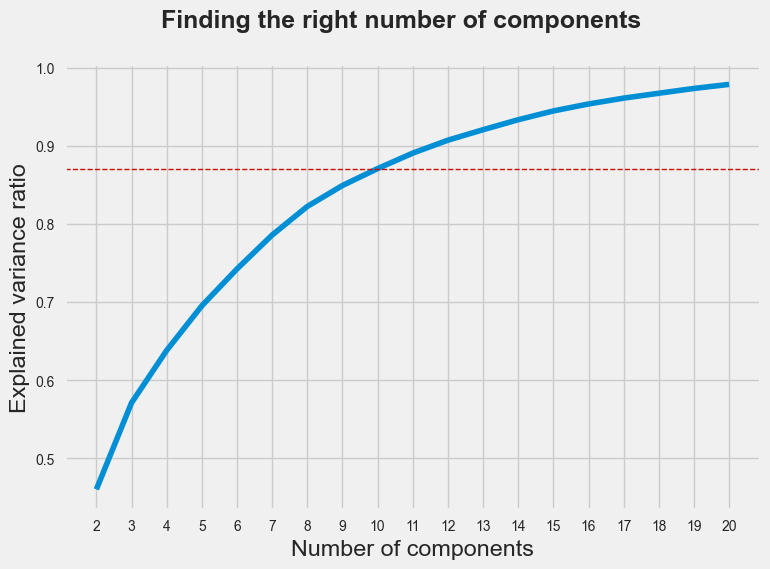

In [ ]:
plt.style.use('fivethirtyeight')

pca_fig, ax = plt.subplots()

ax.plot(range(2, 21), pca_list)

ax.set_xlabel('Number of components')
ax.set_ylabel('Explained variance ratio')

ax.set_xticks(np.arange(2, 21, 1))

ax.axhline(.87, c='r', linestyle='--', linewidth=1)

pca_fig.suptitle("Finding the right number of components", weight = 'bold', size = 18)

Text(0.5, 0.98, 'Finding the right number of components')

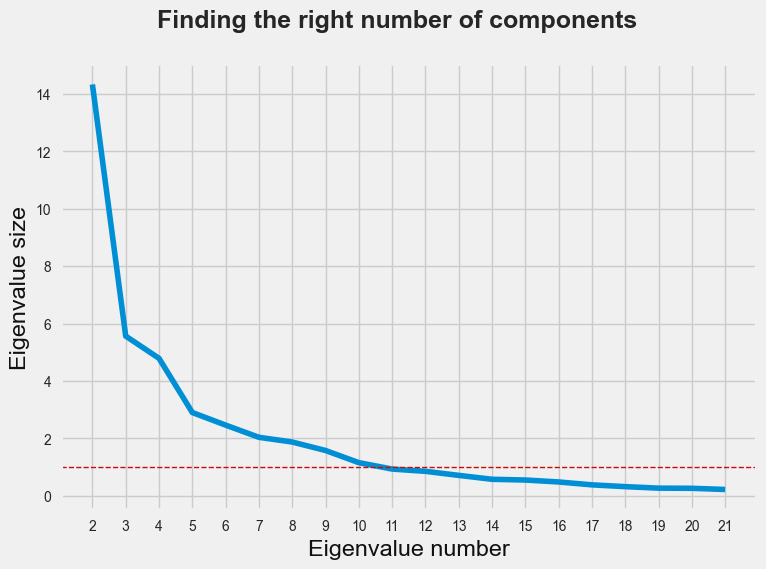

In [ ]:
plt.style.use('fivethirtyeight')

pca_deriv, ax = plt.subplots()

ax.plot(range(2, 22), pca.explained_variance_)

ax.set_xlabel('Eigenvalue number', c='k')
ax.set_ylabel('Eigenvalue size', c='k')

ax.set_xticks(np.arange(2, 22, 1))

ax.axhline(1, c='r', linestyle='--', linewidth=1)

pca_deriv.suptitle("Finding the right number of components", weight = 'bold', size = 18)

In [ ]:
n = 10 # Number of components
cols = [f"PC {x + 1}" for x in range(n)]
pca = PCA(n_components = n)

components = pca.fit_transform(x)

pca_df = pd.DataFrame(data = components, columns = cols)

pca_df['Player'] = data['Player Name']
pca_df = pca_df[['Player'] + cols]

In [ ]:
pca_df.head()

,Player,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10
0,Hamed EHaddadi,10.013678,-3.380336,-3.951142,-2.886089,2.034776,-1.044736,-0.857172,0.979979,-0.150009,0.572929
1,Nick Fazekas,2.642055,-1.518087,-1.108254,-0.019467,1.944228,-2.441284,-0.896221,-2.547797,5.080643,1.055216
2,CJ Giles,4.751280,-0.821901,-2.055322,1.160132,-1.009654,-0.377656,0.388989,1.953421,0.778513,-1.102415
3,Saeid Davarpanah,-1.316833,3.250970,0.111373,2.316501,1.143717,-1.911262,0.861984,0.565366,0.328999,1.962102
4,Rob Loe,4.379153,-0.789605,2.124853,-1.361878,-3.295216,-2.243783,-1.594529,1.171801,-0.507431,-0.113126


In [ ]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.33146032 0.12875319 0.11083971 0.06718833 0.05705254 0.04721627
 0.04342983 0.0365995  0.02680512 0.02164027]
0.8709850803265655


# Section 4: Data Modeling

## Question 1: What Kind of Players we have in the Tournament?

### What Algorithm Should We Choose?

How Many Clusters should we have?

Checking the Silhouette Score for optimal number of clusters

In [ ]:
x = pca_df[pca_df.columns.values[1:]].to_numpy()

silhouette = []

for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 99, n_init=10)
    cluster_labels = kmeans.fit_predict(x)

    centers = kmeans.cluster_centers_

    score = silhouette_score(x, cluster_labels)
    silhouette.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.28511909676476965
For n_clusters = 3, silhouette score is 0.15826627837628465
For n_clusters = 4, silhouette score is 0.1406822864951431
For n_clusters = 5, silhouette score is 0.14111326233300017
For n_clusters = 6, silhouette score is 0.15292314005941707
For n_clusters = 7, silhouette score is 0.1317619584000927
For n_clusters = 8, silhouette score is 0.13204893584162242
For n_clusters = 9, silhouette score is 0.1326015627481444
For n_clusters = 10, silhouette score is 0.14396234441700337
For n_clusters = 11, silhouette score is 0.13603090400687326
For n_clusters = 12, silhouette score is 0.13058587395207585
For n_clusters = 13, silhouette score is 0.13751183662231592
For n_clusters = 14, silhouette score is 0.13809905111633577
For n_clusters = 15, silhouette score is 0.14088291726400326
For n_clusters = 16, silhouette score is 0.12317882890184602
For n_clusters = 17, silhouette score is 0.1310199038681807
For n_clusters = 18, silhouette scor

Text(0.5, 0.98, 'Finding the right number of clusters')

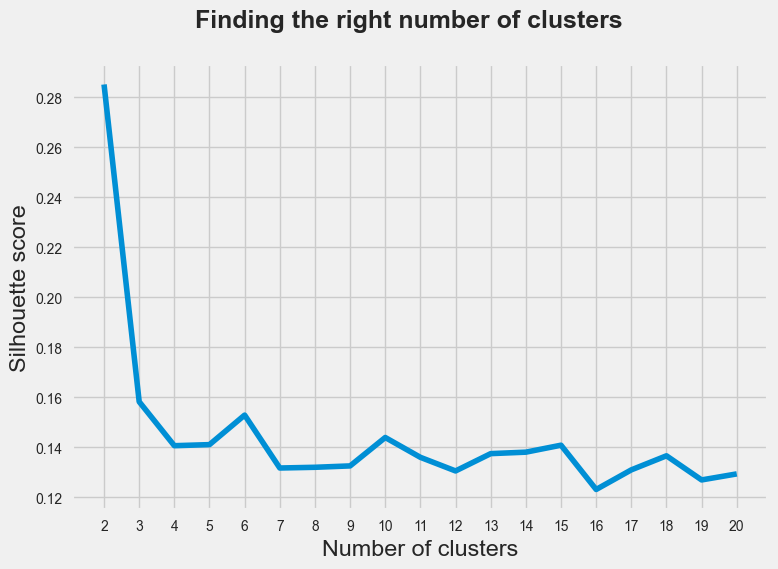

In [ ]:
plt.style.use('fivethirtyeight')

silhouette_fig, ax = plt.subplots()

ax.plot(range(2, 21), silhouette)

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette score')

ax.set_xticks(np.arange(2, 21, 1))

silhouette_fig.suptitle("Finding the right number of clusters", weight = 'bold', size = 18)

Plotting Silhouettes to check for optimal number of clusters

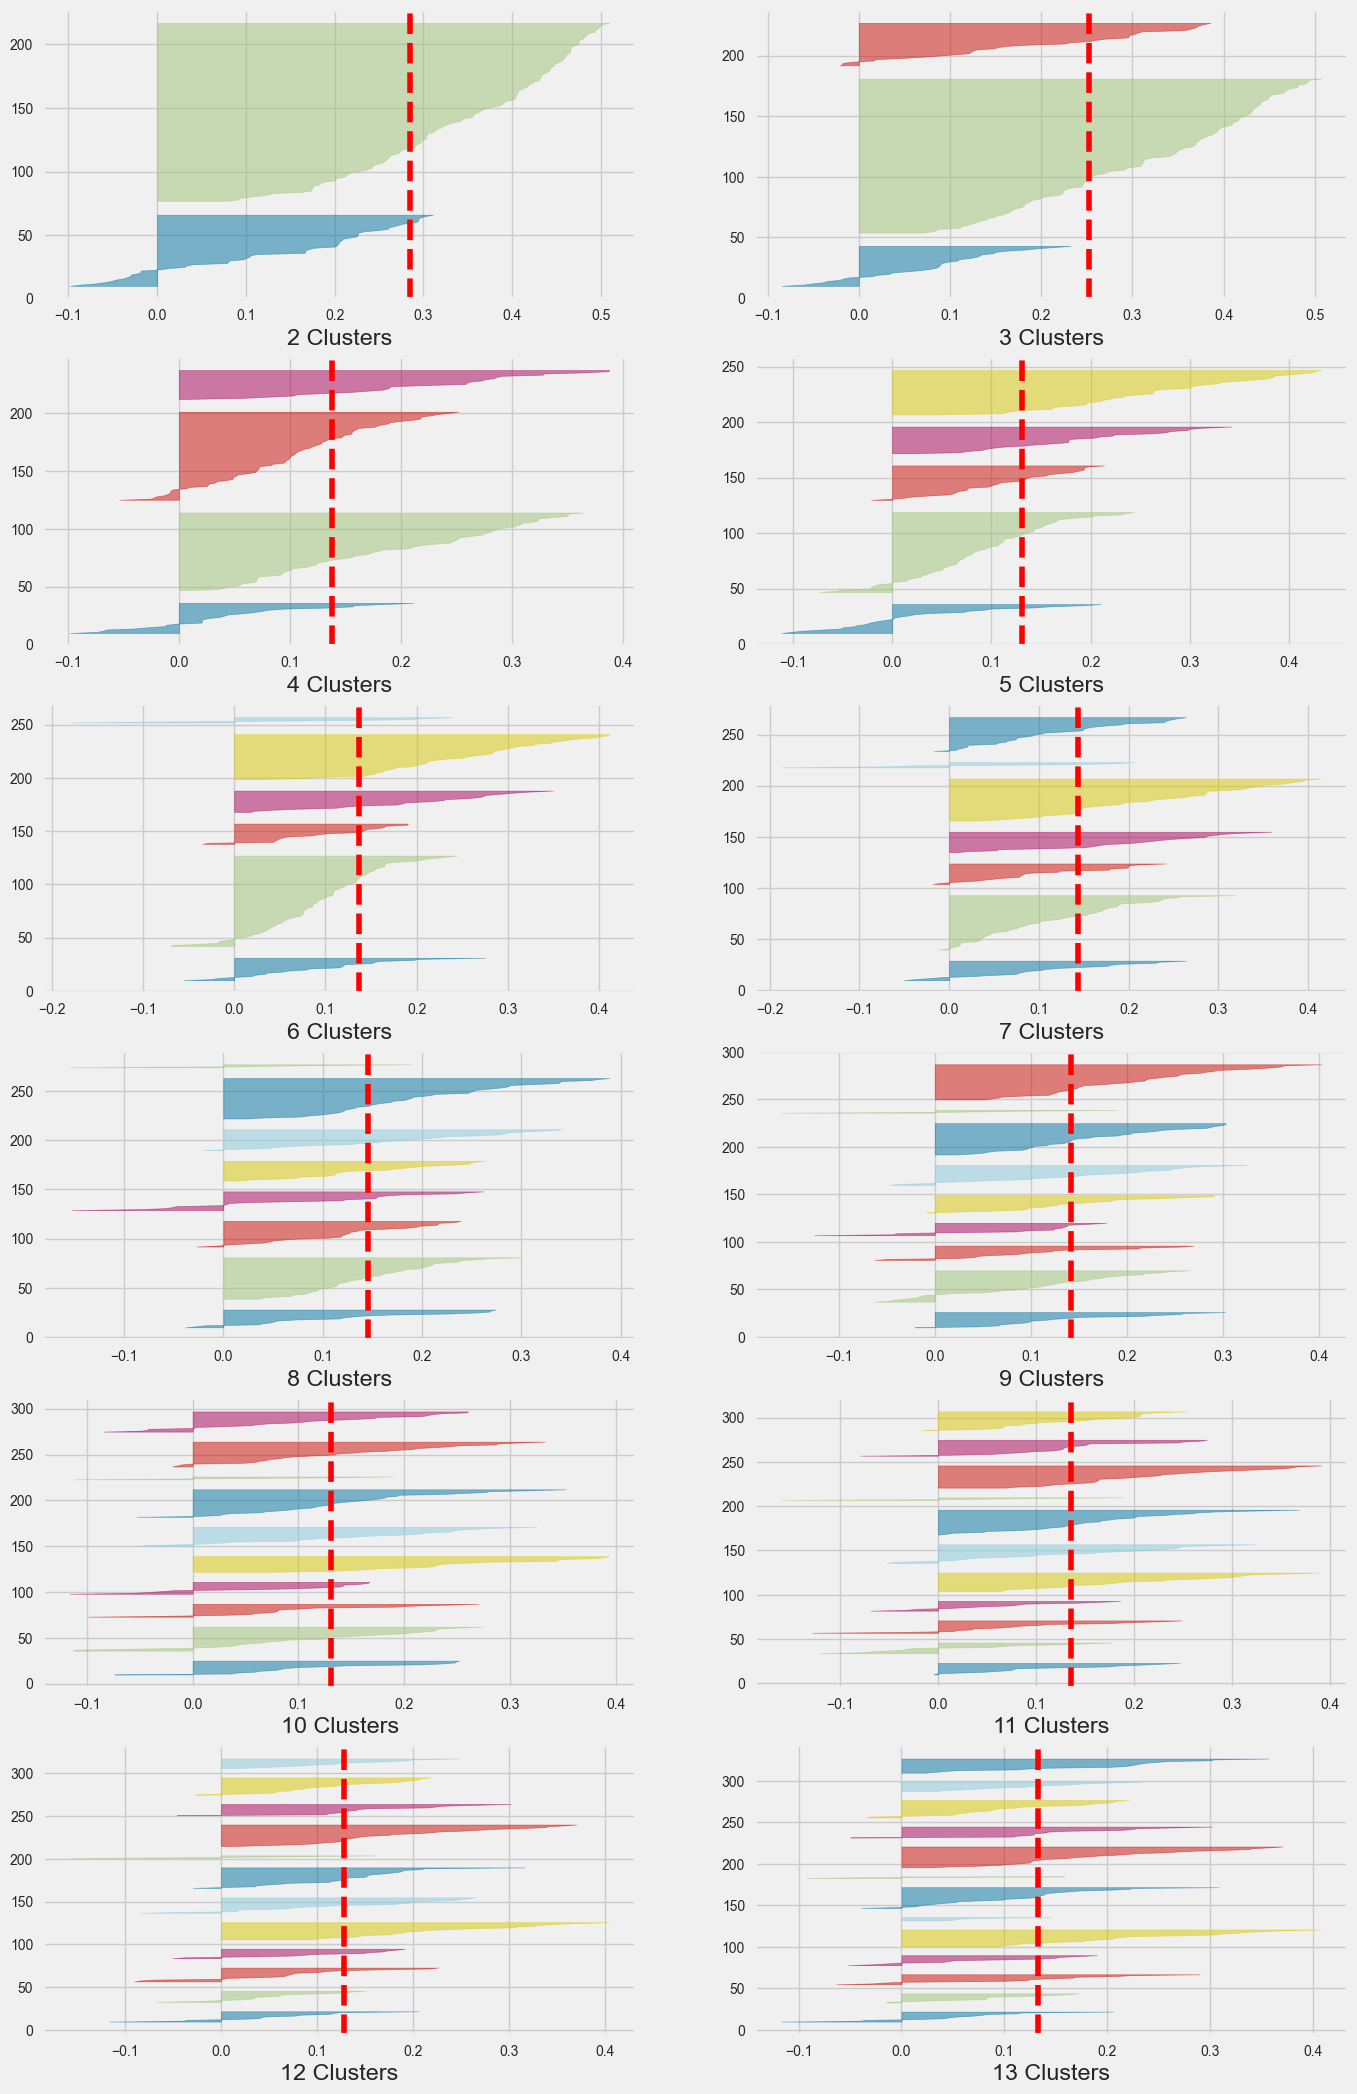

In [ ]:
fig, ax = plt.subplots(6, 2, figsize=(15,25))
for i in [2, 3, 4, 5, 6 ,7, 8, 9, 10, 11, 12, 13]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, n_init='auto', random_state=42, max_iter=300, algorithm='lloyd')
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x)
    visualizer.ax.set_xlabel(f"{i} Clusters")